In [1]:
# basic operations
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import io
# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

In [2]:
# Read csv file
df = pd.read_csv("C:\\Users\\DELL\\employee_attrition_kaggle.csv")

In [3]:
# Show the first 5 rows of dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Changing binary representation of our target variable to 1/0
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

In [5]:
# This shows us the information about the dataset and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Showing how many columns and rows there are in the dataset
df.shape

(1470, 35)

In [7]:
df.size

51450

In [8]:
# Check duplicated values in dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
# Descriptive Statistics: showing the count, mean, std, min/max of our dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.groupby(["Attrition"]).size()

Attrition
0    1233
1     237
dtype: int64

In [11]:
####4. Exploratory Data Analysis

<AxesSubplot:>

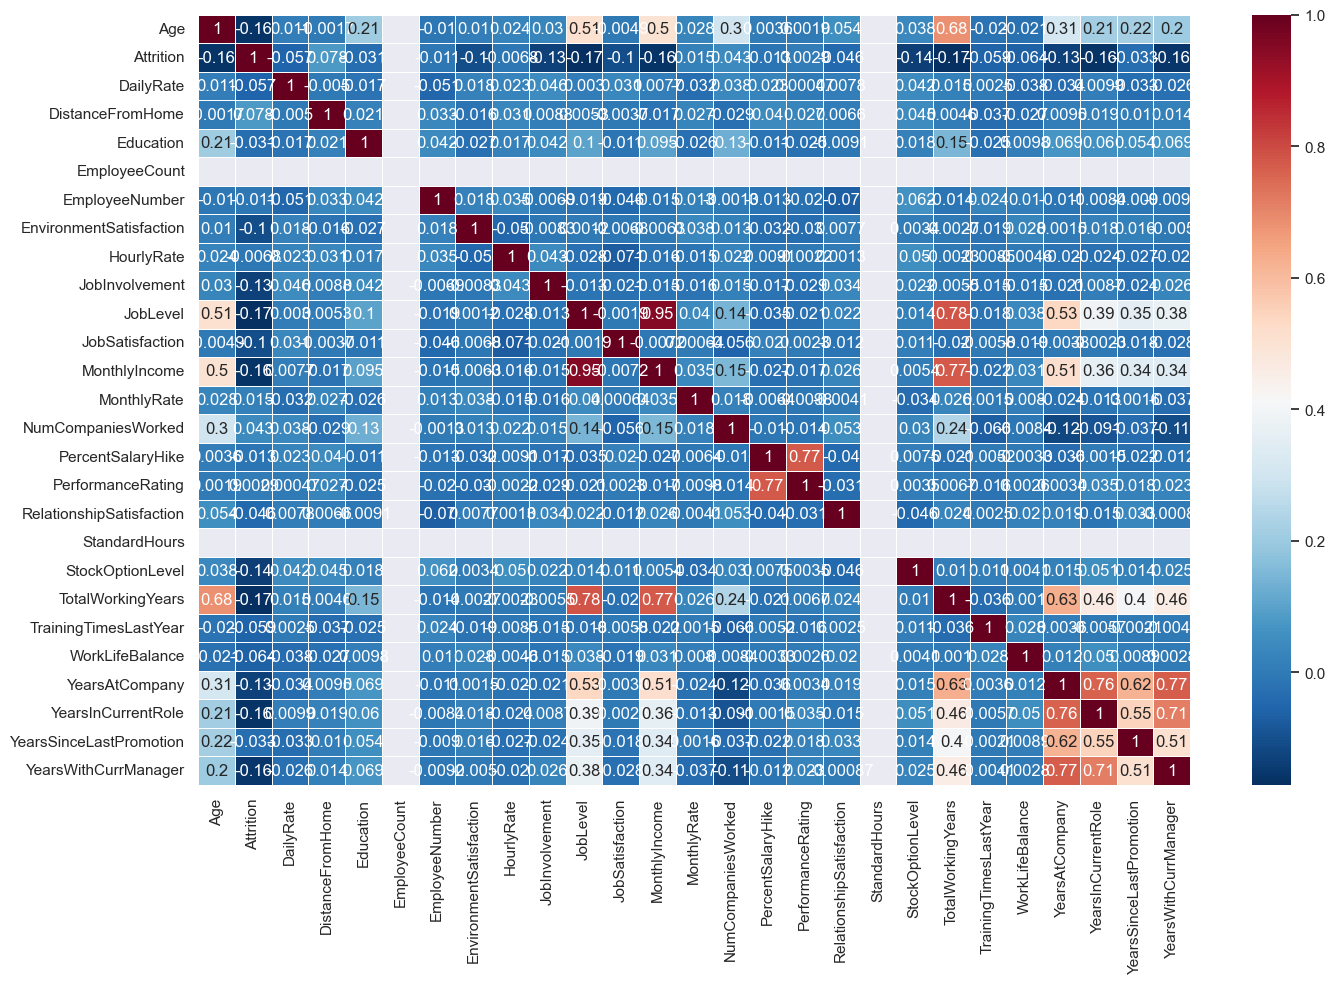

In [12]:
# Use Pearson correlation to find pairwise correlation of all variables
pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

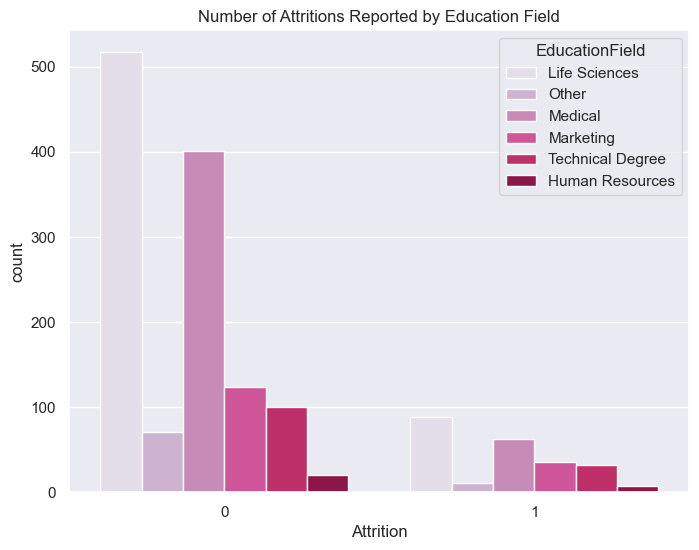

In [13]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='EducationField',data=df, palette = 'PuRd').set_title("Number of Attritions Reported by Education Field")


In [14]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()


EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

In [15]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size()

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
dtype: int64

In [16]:
df[(df["Attrition"] == 0)].groupby(["EducationField"]).size()

EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
dtype: int64

Text(0.5, 1.0, 'Number of Attritions Reported by Over Time')

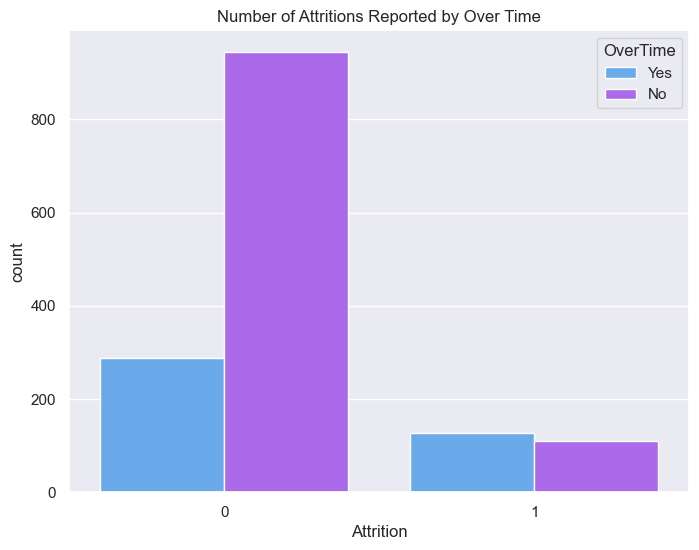

In [17]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='OverTime',data=df, palette = 'cool').set_title("Number of Attritions Reported by Over Time")


Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

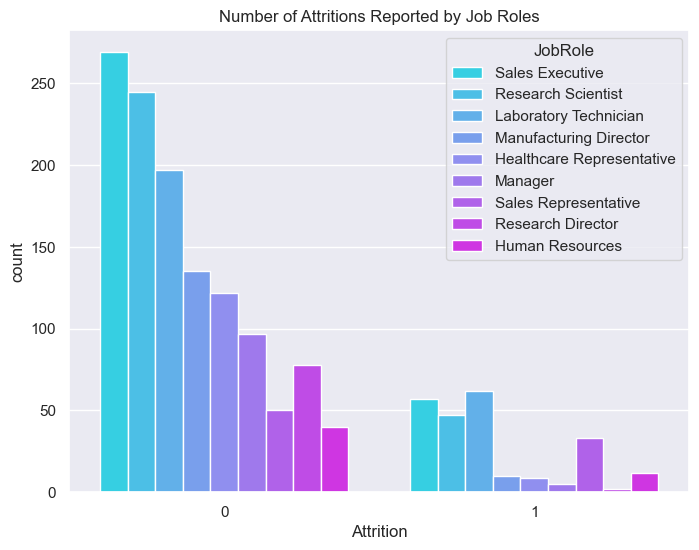

In [18]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='JobRole',data=df, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [19]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
No     0.104364
Yes    0.305288
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

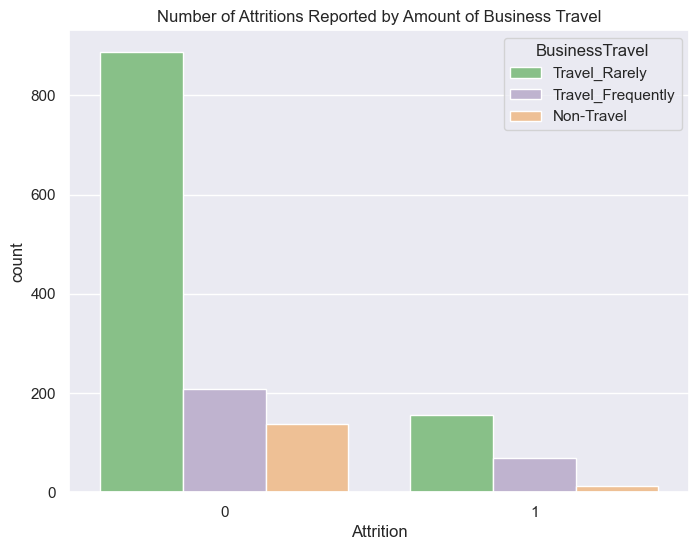

In [20]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='BusinessTravel',data=df, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [21]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

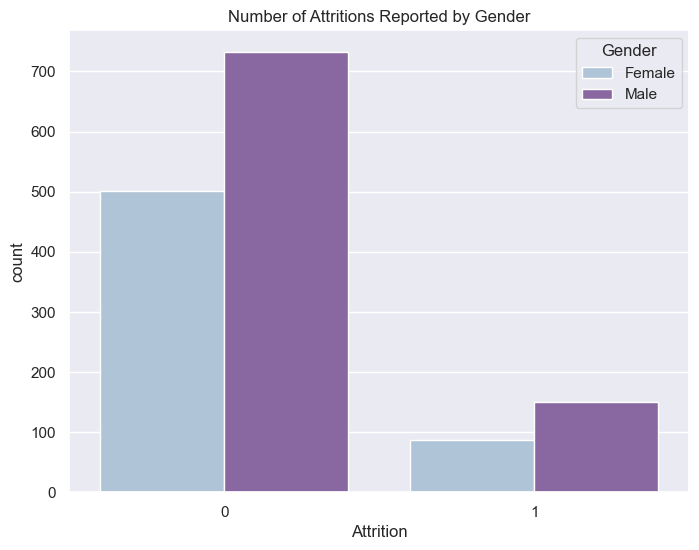

In [22]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='Gender',data=df, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")


In [23]:
df[(df["Attrition"] == 1)].groupby(["Gender"]).size() / df.groupby(["Gender"]).size()

Gender
Female    0.147959
Male      0.170068
dtype: float64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


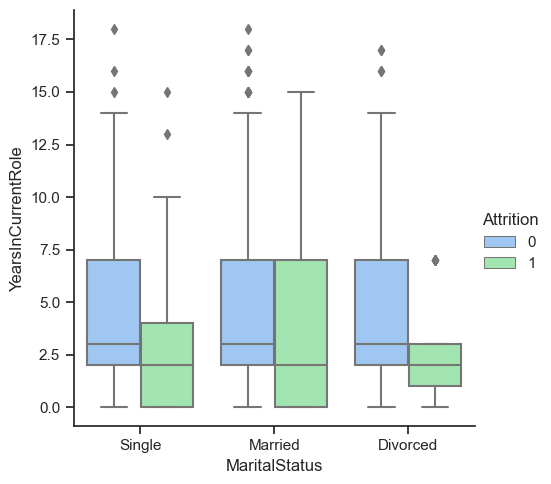

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("MaritalStatus", "YearsInCurrentRole", "Attrition", data=df, kind="box")

Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

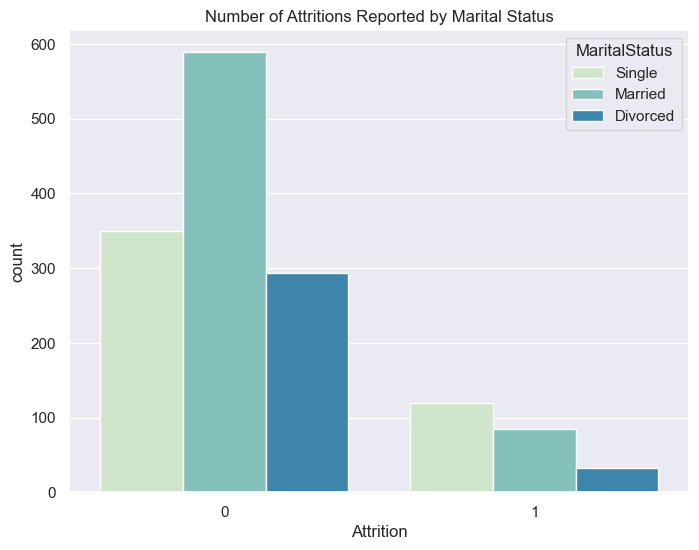

In [25]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='MaritalStatus',data=df, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [26]:
df[(df["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / df.groupby(["MaritalStatus"]).size()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
dtype: float64

In [27]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

In [28]:
###Data Preparation and Modeling


In [29]:
####1. Data Preparation


In [30]:
df2 = df.copy()

In [32]:
# We define our own function to target encode all the categorical variables, replacing them with associated mean relation to fraud_reported. 
# This is because most models only take numerical variables.

def numericizer(df, col, new_df_name):
  new_df_name = df[[col,'Attrition']].groupby([col],as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
  df[col] = df[col].replace(new_df_name[col].values, 1 - new_df_name['Attrition'].values)
  new_df_name = None

In [33]:
lets_use_correlation = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

for i in lets_use_correlation:
  try:
    numericizer(df2, i, "blah")
  except: 
    print(i)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.850431,1102,0.793722,1,2,0.853135,1,1,2,Female,94,3,2,0.825153,4,0.744681,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,0.750903,279,0.861602,8,1,0.853135,1,2,3,Male,61,2,2,0.839041,2,0.875186,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0.850431,1373,0.861602,2,2,0.865854,1,4,4,Male,92,2,1,0.760618,3,0.744681,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,0.750903,1392,0.861602,3,4,0.853135,1,5,4,Female,56,3,1,0.839041,3,0.875186,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0.850431,591,0.861602,2,1,0.864224,1,7,1,Male,40,3,1,0.760618,2,0.875186,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0.750903,884,0.861602,23,2,0.864224,1,2061,3,Male,41,4,2,0.760618,4,0.875186,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,0.850431,613,0.861602,6,1,0.864224,1,2062,4,Male,42,2,3,0.931298,1,0.875186,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,0.850431,155,0.861602,4,3,0.853135,1,2064,2,Male,87,4,2,0.931034,2,0.875186,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,0.750903,1023,0.793722,2,3,0.864224,1,2065,4,Male,63,2,2,0.825153,2,0.875186,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [34]:
# Changing binary representation of Gender, Overtime variables to 1/0
df2.Gender = df.Gender.map({'Male':1, 'Female':0})
df2.OverTime = df.OverTime.map({'Yes':1, 'No':0})

<AxesSubplot:>

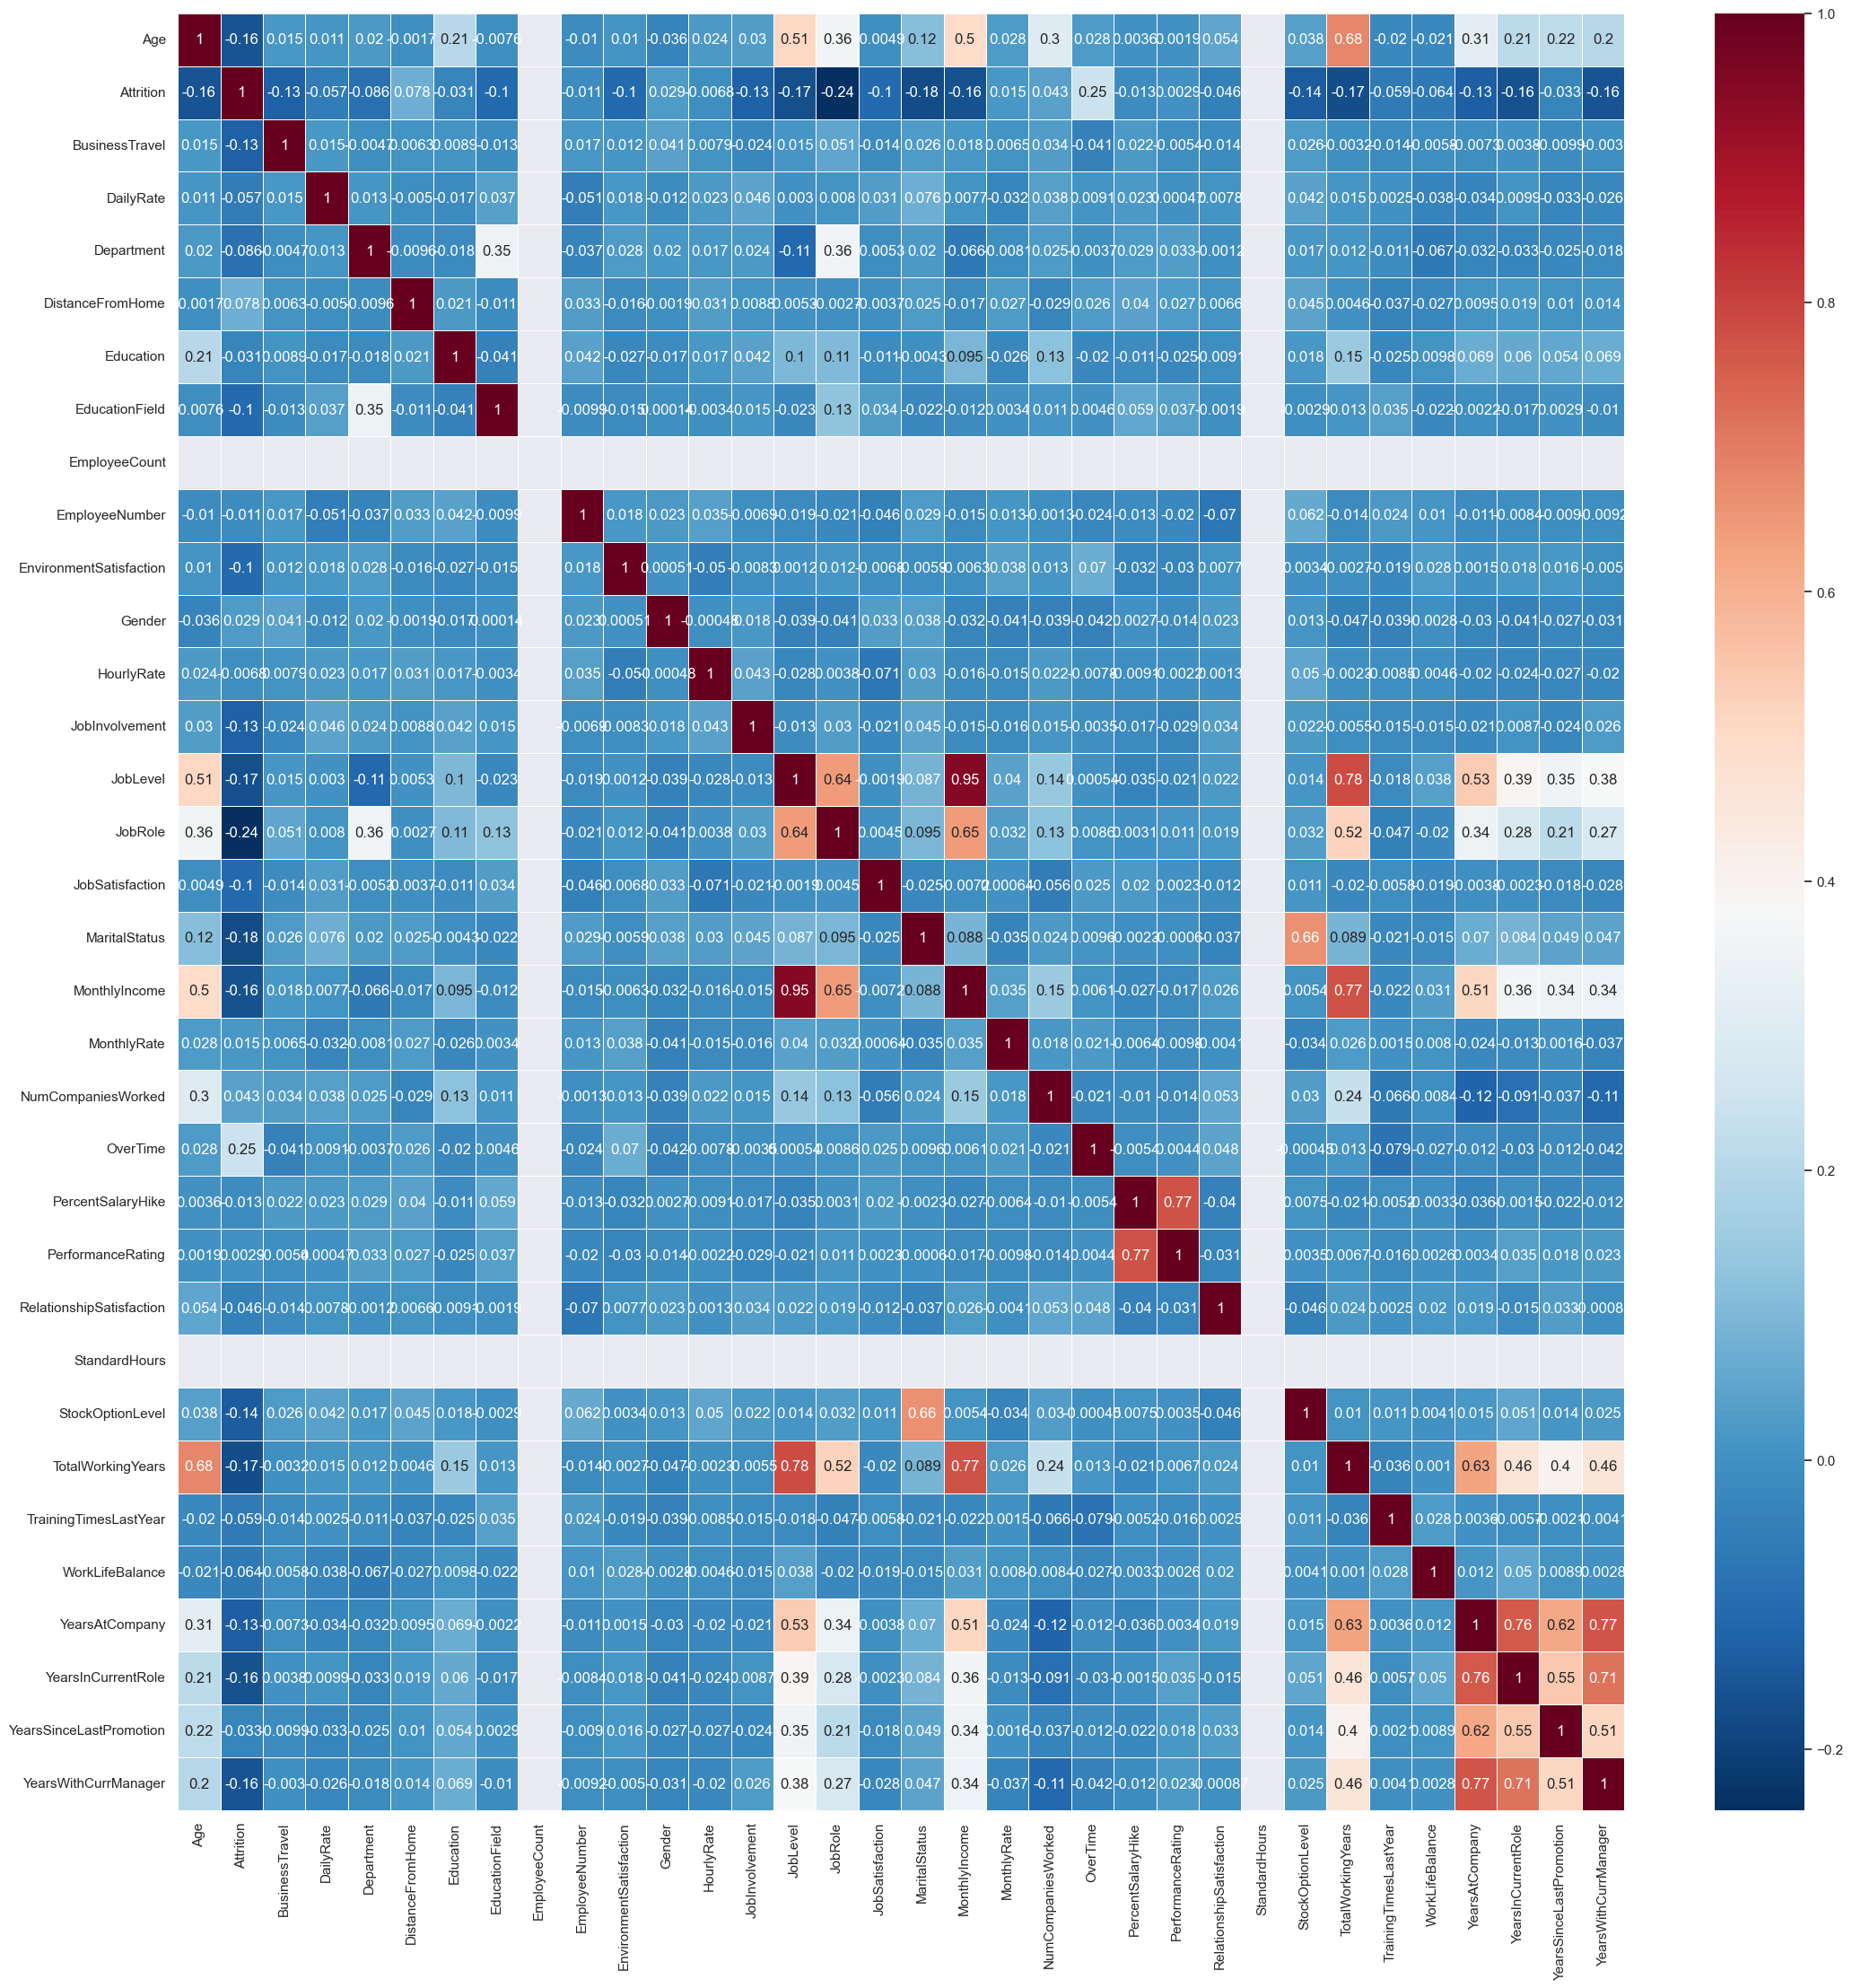

In [35]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = df2.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [37]:
# Picking the features that have absolute correlation value greater than 0.1 
df3 = df2[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [38]:
# Separating dataset into x & y, where y is the target variable
x = df3.drop('Attrition', axis = 1)
y = df3['Attrition']
# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


In [39]:
# Building logisticregression model to fit training model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR

D:\anaconda\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\anaconda\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [40]:
# Using training model to predict
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

In [41]:
# Create confusion matrix function
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

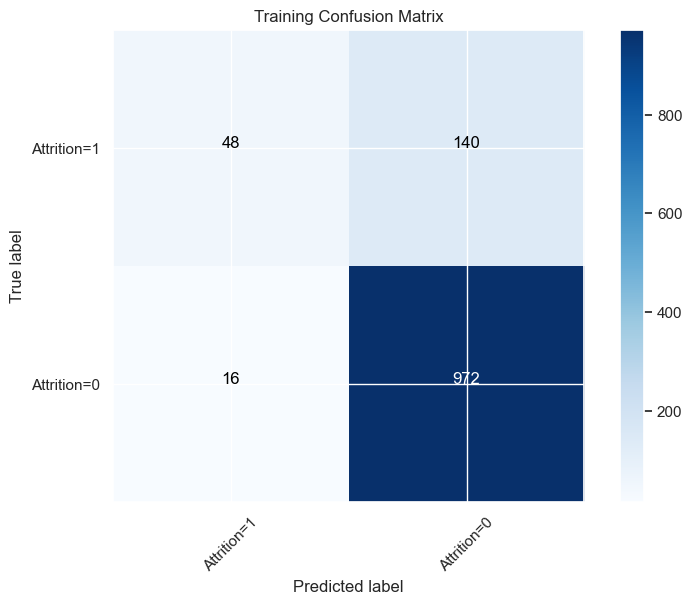

In [42]:
# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')

In [43]:
# Scoring the training model
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       988
           1       0.75      0.26      0.38       188

    accuracy                           0.87      1176
   macro avg       0.81      0.62      0.65      1176
weighted avg       0.85      0.87      0.84      1176



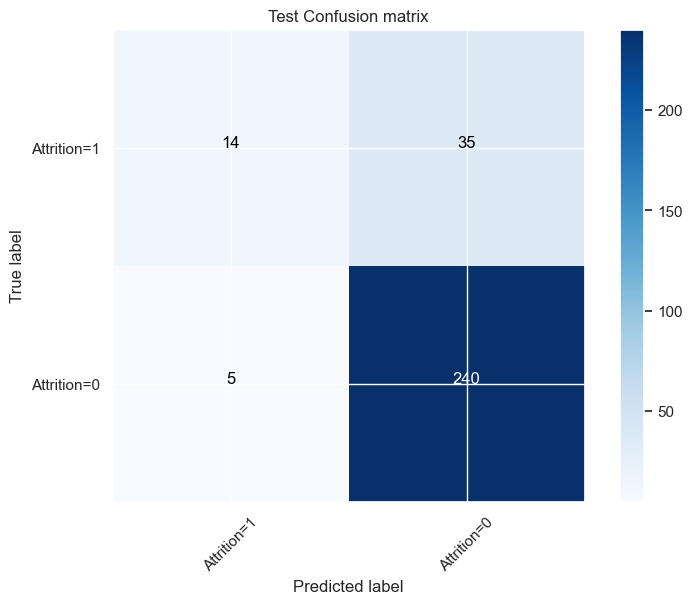

In [44]:
# Compute confusion matrix for testing data
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Test Confusion matrix')

In [45]:
print (classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.74      0.29      0.41        49

    accuracy                           0.86       294
   macro avg       0.80      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



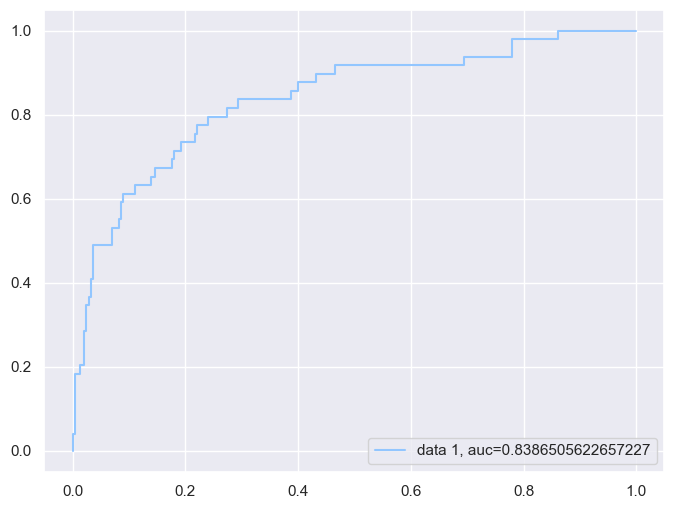

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.352552
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.202     
Dependent Variable:   Attrition          AIC:                1068.5037 
Date:                 2024-06-27 20:49   BIC:                1153.1920 
No. Observations:     1470               Log-Likelihood:     -518.25   
Df Model:             15                 LL-Null:            -649.29   
Df Residuals:         1454               LLR p-value:        4.0102e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Age                     -0.0109   0.0119 -0.9159 0.3597 -0.0342

In [48]:
# Reselect features that have a p-value less than 0.05
df4 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [49]:
# Separating dataset into x & y, where y is the target variable
x1 = df4.drop('Attrition', axis = 1)
y1 = df4['Attrition']

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356714
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.192     
Dependent Variable:   Attrition          AIC:                1068.7397 
Date:                 2024-06-27 20:49   BIC:                1121.6698 
No. Observations:     1470               Log-Likelihood:     -524.37   
Df Model:             9                  LL-Null:            -649.29   
Df Residuals:         1460               LLR p-value:        1.0767e-48
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.3565   0.9490  6.6983 0.0000  4.4966

In [51]:
# Continue to Reselect features that have a p-value less than 0.05
df5 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [52]:
# Separating dataset into x & y, where y is the target variable
x1 = df5.drop('Attrition', axis = 1)
y1 = df5['Attrition']

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.357260
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.191     
Dependent Variable:   Attrition          AIC:                1068.3445 
Date:                 2024-06-27 20:50   BIC:                1115.9817 
No. Observations:     1470               Log-Likelihood:     -525.17   
Df Model:             8                  LL-Null:            -649.29   
Df Residuals:         1461               LLR p-value:        4.0707e-49
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.2164   0.9411  6.6056 0.0000  4.3719

In [54]:
# Continue to Reselect features that have a p-value less than 0.05
df6 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel']]

In [55]:
# Separating dataset into x & y, where y is the target variable
x1 = df6.drop('Attrition', axis = 1)
y1 = df6['Attrition']

In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363654
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.177     
Dependent Variable:   Attrition          AIC:                1083.1425 
Date:                 2024-06-27 20:51   BIC:                1120.1936 
No. Observations:     1470               Log-Likelihood:     -534.57   
Df Model:             6                  LL-Null:            -649.29   
Df Residuals:         1463               LLR p-value:        1.0081e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.7398   0.9304  7.2437 0.0000  4.9162